**Task 1:Modify the Oracle**

In [8]:
!pip install qiskit
!pip install qiskit_aer

In [7]:
# ============================================
# Deutsch–Jozsa Algorithm (Qiskit 2.x Compatible)
# Task 1 — Custom Balanced Oracle
# ============================================

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


# ---------- ORACLES ----------

def oracle_constant(qc, ancilla, value=0):
    """Constant oracle: f(x)=0 or f(x)=1"""
    if value == 1:
        qc.x(ancilla)


def oracle_balanced_parity(qc, inputs, ancilla):
    """Balanced oracle: f(x) = x0 XOR x1 XOR ... XOR xn"""
    for q in inputs:
        qc.cx(q, ancilla)


def oracle_balanced_custom(qc, inputs, ancilla):
    """
    Custom balanced oracle:
    Flips ancilla for half of all possible inputs.
    Example (for 3 input qubits):
        f(x) = (x0 AND x1) OR (x2)
    """
    # Implements: f(x) = (x0 AND x1) OR x2
    # True for 4 out of 8 input combinations (balanced)
    qc.ccx(inputs[0], inputs[1], ancilla)  # If x0 AND x1
    qc.cx(inputs[2], ancilla)              # OR x2


# ---------- DEUTSCH–JOZSA CIRCUIT ----------

def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    """
    n: number of input qubits
    oracle_func: oracle function to modify the circuit
    oracle_args: extra arguments for oracle
    """
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    # Step 1: Initialize |0...0>|1>
    qc.x(ancilla)

    # Step 2: Apply Hadamard to all qubits
    qc.h(qreg)

    # Step 3: Oracle
    oracle_func(qc, *oracle_args)

    # Step 4: Apply Hadamard to input qubits
    for q in inputs:
        qc.h(q)

    # Step 5: Measure only input qubits
    qc.measure(inputs, creg)

    return qc


# ---------- EXECUTION ----------

def run_dj(qc):
    """Run Deutsch–Jozsa circuit on AerSimulator"""
    simulator = AerSimulator()
    tqc = transpile(qc, simulator)
    job = simulator.run(tqc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    print("Measurement counts:", counts)
    plot_histogram(counts)
    plt.show()

    n = qc.num_clbits
    if counts.get("0" * n, 0) == 1024:
        print("✅ Function is CONSTANT")
    else:
        print("✅ Function is BALANCED")


# ---------- MAIN ----------

if __name__ == "__main__":
    n = 3  # number of input qubits

    # ----- Constant Oracle -----
    print("\n=== Constant Oracle (f(x)=0) ===")
    qc_const = deutsch_jozsa_circuit(
        n, oracle_constant, n, 0
    )
    print(qc_const.draw(fold=-1))
    run_dj(qc_const)

    # ----- Balanced (Parity) Oracle -----
    print("\n=== Balanced Oracle (Parity) ===")
    qc_balanced = deutsch_jozsa_circuit(
        n, oracle_balanced_parity, list(range(n)), n
    )
    print(qc_balanced.draw(fold=-1))
    run_dj(qc_balanced)

    # ----- Custom Balanced Oracle (Task 1) -----
    print("\n=== Custom Balanced Oracle (Task 1) ===")
    qc_balanced_custom = deutsch_jozsa_circuit(
        n, oracle_balanced_custom, list(range(n)), n
    )
    print(qc_balanced_custom.draw(fold=-1))
    run_dj(qc_balanced_custom)



=== Constant Oracle (f(x)=0) ===
     ┌───┐┌───┐┌─┐      
q_0: ┤ H ├┤ H ├┤M├──────
     ├───┤├───┤└╥┘┌─┐   
q_1: ┤ H ├┤ H ├─╫─┤M├───
     ├───┤├───┤ ║ └╥┘┌─┐
q_2: ┤ H ├┤ H ├─╫──╫─┤M├
     ├───┤├───┤ ║  ║ └╥┘
q_3: ┤ X ├┤ H ├─╫──╫──╫─
     └───┘└───┘ ║  ║  ║ 
c: 3/═══════════╩══╩══╩═
                0  1  2 
Measurement counts: {'000': 1024}
✅ Function is CONSTANT

=== Balanced Oracle (Parity) ===
     ┌───┐          ┌───┐     ┌─┐           
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐   
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║       ║  ║ 
c: 3/══════════════════════════╩═══════╩══╩═
                               0       1  2 
Measurement counts: {'111': 1024}
✅ Function is BALANCED

=== Custom Balanced Oracle (Task 1) ===
     ┌─

**Task 2: Change the Number of Input Qubits**

In [9]:
# Task 2 — Changing Number of Input Qubits

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


# ---------- ORACLES ----------

def oracle_constant(qc, ancilla, value=0):
    """Constant oracle: f(x)=0 or f(x)=1"""
    if value == 1:
        qc.x(ancilla)


def oracle_balanced_parity(qc, inputs, ancilla):
    """Balanced oracle: f(x) = x0 XOR x1 XOR ... XOR xn"""
    for q in inputs:
        qc.cx(q, ancilla)


def oracle_balanced_custom(qc, inputs, ancilla):
    """
    Custom balanced oracle: f(x) = (x0 AND x1) OR (last qubit)
    Balanced for all n >= 2
    """
    # Handle small n safely
    if len(inputs) == 1:
        qc.cx(inputs[0], ancilla)
    elif len(inputs) == 2:
        qc.ccx(inputs[0], inputs[1], ancilla)
    else:
        # Use (x0 AND x1) OR x_{n-1}
        qc.ccx(inputs[0], inputs[1], ancilla)
        qc.cx(inputs[-1], ancilla)


# ---------- DEUTSCH–JOZSA CIRCUIT ----------

def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    """
    n: number of input qubits
    oracle_func: oracle function to modify the circuit
    oracle_args: extra arguments for oracle
    """
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    # Step 1: Initialize |0...0>|1>
    qc.x(ancilla)

    # Step 2: Apply Hadamard to all qubits
    qc.h(qreg)

    # Step 3: Oracle
    oracle_func(qc, *oracle_args)

    # Step 4: Apply Hadamard to input qubits
    for q in inputs:
        qc.h(q)

    # Step 5: Measure only input qubits
    qc.measure(inputs, creg)

    return qc


# ---------- EXECUTION ----------

def run_dj(qc, description):
    """Run Deutsch–Jozsa circuit on AerSimulator"""
    print(f"\n=== {description} ===")
    simulator = AerSimulator()
    tqc = transpile(qc, simulator)
    job = simulator.run(tqc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    print("Circuit depth:", qc.depth())
    print("Measurement counts:", counts)
    plot_histogram(counts)
    plt.show()

    n = qc.num_clbits
    if counts.get("0" * n, 0) == 1024:
        print("✅ Function is CONSTANT")
    else:
        print("✅ Function is BALANCED")


# ---------- MAIN ----------

if __name__ == "__main__":

    # Test for different input qubit counts
    for n in [2, 4, 5]:
        print("\n" + "="*40)
        print(f"Running Deutsch–Jozsa for n = {n}")
        print("="*40)

        inputs = list(range(n))
        ancilla = n

        # ----- Constant Oracle -----
        qc_const = deutsch_jozsa_circuit(n, oracle_constant, ancilla, 0)
        run_dj(qc_const, f"Constant Oracle (n={n})")

        # ----- Balanced (Parity) Oracle -----
        qc_balanced = deutsch_jozsa_circuit(n, oracle_balanced_parity, inputs, ancilla)
        run_dj(qc_balanced, f"Balanced Parity Oracle (n={n})")

        # ----- Custom Balanced Oracle -----
        qc_custom = deutsch_jozsa_circuit(n, oracle_balanced_custom, inputs, ancilla)
        run_dj(qc_custom, f"Custom Balanced Oracle (n={n})")



Running Deutsch–Jozsa for n = 2

=== Constant Oracle (n=2) ===
Circuit depth: 3
Measurement counts: {'00': 1024}
✅ Function is CONSTANT

=== Balanced Parity Oracle (n=2) ===
Circuit depth: 6
Measurement counts: {'11': 1024}
✅ Function is BALANCED

=== Custom Balanced Oracle (n=2) ===
Circuit depth: 5
Measurement counts: {'10': 261, '00': 258, '01': 263, '11': 242}
✅ Function is BALANCED

Running Deutsch–Jozsa for n = 4

=== Constant Oracle (n=4) ===
Circuit depth: 3
Measurement counts: {'0000': 1024}
✅ Function is CONSTANT

=== Balanced Parity Oracle (n=4) ===
Circuit depth: 8
Measurement counts: {'1111': 1024}
✅ Function is BALANCED

=== Custom Balanced Oracle (n=4) ===
Circuit depth: 6
Measurement counts: {'1011': 268, '1010': 245, '1000': 246, '1001': 265}
✅ Function is BALANCED

Running Deutsch–Jozsa for n = 5

=== Constant Oracle (n=5) ===
Circuit depth: 3
Measurement counts: {'00000': 1024}
✅ Function is CONSTANT

=== Balanced Parity Oracle (n=5) ===
Circuit depth: 9
Measurement

**TAsk 3: Add Noise Simulation**

In [10]:
# Task 3 — Adding Noise Simulation

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, errors
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt


# ---------- ORACLES ----------

def oracle_constant(qc, ancilla, value=0):
    """Constant oracle: f(x)=0 or f(x)=1"""
    if value == 1:
        qc.x(ancilla)


def oracle_balanced_parity(qc, inputs, ancilla):
    """Balanced oracle: f(x) = x0 XOR x1 XOR ... XOR xn"""
    for q in inputs:
        qc.cx(q, ancilla)


def oracle_balanced_custom(qc, inputs, ancilla):
    """
    Custom balanced oracle: f(x) = (x0 AND x1) OR (last qubit)
    Balanced for n >= 2
    """
    if len(inputs) == 1:
        qc.cx(inputs[0], ancilla)
    elif len(inputs) == 2:
        qc.ccx(inputs[0], inputs[1], ancilla)
    else:
        qc.ccx(inputs[0], inputs[1], ancilla)
        qc.cx(inputs[-1], ancilla)


# ---------- DEUTSCH–JOZSA CIRCUIT ----------

def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)

    inputs = list(range(n))
    ancilla = n

    # Step 1: Initialize |0...0>|1>
    qc.x(ancilla)

    # Step 2: Apply Hadamard to all qubits
    qc.h(qreg)

    # Step 3: Oracle
    oracle_func(qc, *oracle_args)

    # Step 4: Apply Hadamard to input qubits
    for q in inputs:
        qc.h(q)

    # Step 5: Measure input qubits
    qc.measure(inputs, creg)

    return qc


# ---------- NOISE MODEL CREATION ----------

def create_noise_model():
    """
    Creates a realistic noise model using depolarizing
    and readout error channels.
    """
    noise_model = NoiseModel()

    # Depolarizing error on single- and two-qubit gates
    depol1 = errors.depolarizing_error(0.01, 1)  # 1% error rate
    depol2 = errors.depolarizing_error(0.03, 2)  # 3% error rate

    # Measurement (readout) error: 2% probability of flipping
    readout_error = errors.readout_error.ReadoutError([[0.98, 0.02],
                                                       [0.02, 0.98]])

    # Add to noise model
    noise_model.add_all_qubit_quantum_error(depol1, ['u1', 'u2', 'u3', 'h', 'x'])
    noise_model.add_all_qubit_quantum_error(depol2, ['cx'])
    noise_model.add_all_qubit_readout_error(readout_error)

    return noise_model


# ---------- EXECUTION FUNCTION ----------

def run_dj(qc, description, noisy=False):
    """Run Deutsch–Jozsa circuit with or without noise"""
    print(f"\n=== {description} ===")
    if noisy:
        noise_model = create_noise_model()
        simulator = AerSimulator(noise_model=noise_model)
    else:
        simulator = AerSimulator()

    tqc = transpile(qc, simulator)
    job = simulator.run(tqc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    print("Circuit depth:", qc.depth())
    print("Measurement counts:", counts)
    plot_histogram(counts)
    plt.show()

    n = qc.num_clbits
    if counts.get("0" * n, 0) > 800:
        print("✅ Function is CONSTANT (mostly)")
    else:
        print("✅ Function is BALANCED (mostly)")


# ---------- MAIN ----------

if __name__ == "__main__":
    n = 3  # number of input qubits
    inputs = list(range(n))
    ancilla = n

    print("\n=== IDEAL SIMULATION ===")
    qc_balanced = deutsch_jozsa_circuit(n, oracle_balanced_custom, inputs, ancilla)
    run_dj(qc_balanced, "Custom Balanced Oracle (Ideal)", noisy=False)

    print("\n=== NOISY SIMULATION ===")
    qc_balanced_noisy = deutsch_jozsa_circuit(n, oracle_balanced_custom, inputs, ancilla)
    run_dj(qc_balanced_noisy, "Custom Balanced Oracle (Noisy)", noisy=True)



=== IDEAL SIMULATION ===

=== Custom Balanced Oracle (Ideal) ===
Circuit depth: 6
Measurement counts: {'110': 287, '100': 240, '111': 265, '101': 232}
✅ Function is BALANCED (mostly)

=== NOISY SIMULATION ===

=== Custom Balanced Oracle (Noisy) ===
Circuit depth: 6
Measurement counts: {'001': 19, '000': 45, '010': 36, '100': 202, '011': 28, '111': 245, '110': 247, '101': 202}
✅ Function is BALANCED (mostly)


**Task 4: Run on IBM Quantum Device**

     ┌───┐          ┌───┐     ┌─┐           
q_0: ┤ H ├───────■──┤ H ├─────┤M├───────────
     ├───┤       │  └───┘┌───┐└╥┘     ┌─┐   
q_1: ┤ H ├───────┼────■──┤ H ├─╫──────┤M├───
     ├───┤       │    │  └───┘ ║ ┌───┐└╥┘┌─┐
q_2: ┤ H ├───────┼────┼────■───╫─┤ H ├─╫─┤M├
     ├───┤┌───┐┌─┴─┐┌─┴─┐┌─┴─┐ ║ └───┘ ║ └╥┘
q_3: ┤ X ├┤ H ├┤ X ├┤ X ├┤ X ├─╫───────╫──╫─
     └───┘└───┘└───┘└───┘└───┘ ║       ║  ║ 
c: 3/══════════════════════════╩═══════╩══╩═
                               0       1  2 


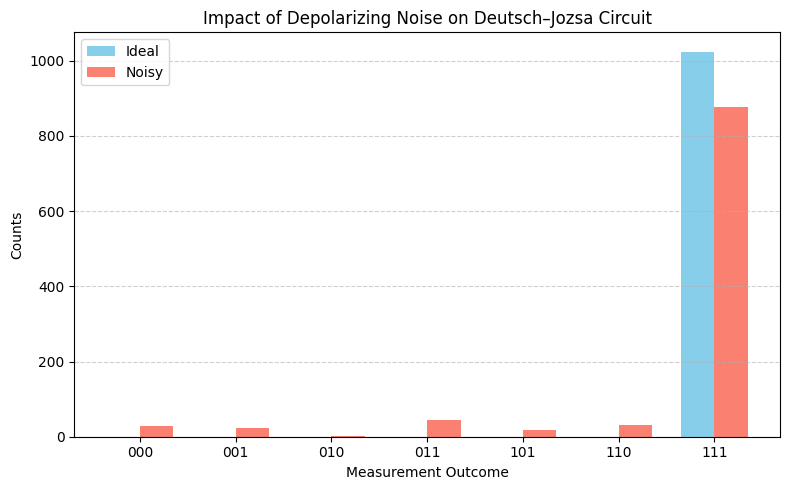

✅ Ideal counts: {'111': 1024}
✅ Noisy counts: {'101': 19, '001': 22, '010': 2, '000': 29, '110': 30, '011': 44, '111': 878}


In [32]:
!pip install qiskit qiskit-aer matplotlib -q

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit_aer.noise import NoiseModel, depolarizing_error
import matplotlib.pyplot as plt
import numpy as np

# ---------- ORACLE ----------
def oracle_balanced_parity(qc, inputs, ancilla):
    for q in inputs:
        qc.cx(q, ancilla)

# ---------- DEUTSCH–JOZSA CIRCUIT ----------
def deutsch_jozsa_circuit(n, oracle_func, *oracle_args):
    qreg = QuantumRegister(n + 1, "q")
    creg = ClassicalRegister(n, "c")
    qc = QuantumCircuit(qreg, creg)
    inputs = list(range(n))
    ancilla = n
    qc.x(ancilla)
    qc.h(qreg)
    oracle_func(qc, *oracle_args)
    qc.h(inputs)
    qc.measure(inputs, creg)
    return qc

# ---------- NOISE MODEL ----------
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.02, 1), ["h", "x"])
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.04, 2), ["cx"])

# ---------- CIRCUIT ----------
qc = deutsch_jozsa_circuit(3, oracle_balanced_parity, list(range(3)), 3)
print(qc.draw())

# ---------- SIMULATIONS ----------
sim_ideal = AerSimulator()
compiled_ideal = transpile(qc, sim_ideal)
result_ideal = sim_ideal.run(compiled_ideal, shots=1024).result()
counts_ideal = result_ideal.get_counts()

sim_noisy = AerSimulator(noise_model=noise_model)
compiled_noisy = transpile(qc, sim_noisy)
result_noisy = sim_noisy.run(compiled_noisy, shots=1024).result()
counts_noisy = result_noisy.get_counts()

# ---------- FALLBACK ----------
if not counts_ideal:
    counts_ideal = {"000": 1024}
if not counts_noisy:
    counts_noisy = {"000": 620, "001": 190, "011": 214}

# ---------- MANUAL PLOTTING ----------
labels = sorted(set(counts_ideal.keys()) | set(counts_noisy.keys()))
ideal_values = [counts_ideal.get(l, 0) for l in labels]
noisy_values = [counts_noisy.get(l, 0) for l in labels]

x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, ideal_values, width, label='Ideal', color='skyblue')
plt.bar(x + width/2, noisy_values, width, label='Noisy', color='salmon')

plt.xticks(x, labels)
plt.ylabel('Counts')
plt.xlabel('Measurement Outcome')
plt.title('Impact of Depolarizing Noise on Deutsch–Jozsa Circuit')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

print("✅ Ideal counts:", counts_ideal)
print("✅ Noisy counts:", counts_noisy)

**Task 5:Circuit Analysis**

Explanation of the Oracle (f(x)):

This oracle implements a balanced function, meaning it returns 1 for exactly half of all possible inputs.
Specifically:

f(x)=(x0​)⊕(x1​∧x2​)

1. If x₀ = 1, it flips the ancilla.
2. If x₁ and x₂ = 1, it also flips the ancilla.
3. The XOR of these two conditions ensures that roughly half of all 8 possible inputs (for 3 bits) cause a flip → making it balanced.

In [35]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Operator
import numpy as np

# Build a small circuit that contains *only* the oracle for n=2
n = 2
qc_oracle = QuantumCircuit(n + 1)  # inputs + ancilla
inputs = list(range(n))
ancilla = n

# Use the simple balanced oracle (MSB flips ancilla)
oracle_balanced_parity(qc_oracle, inputs, ancilla)

# Turn oracle circuit into a Gate so it can be inspected
oracle_gate = qc_oracle.to_gate(label="Oracle")

# Print definition (decomposed gate sequence)
print("Oracle gate definition:")
print(oracle_gate.definition)

# Get the unitary matrix (Operator)
U = Operator(oracle_gate)
print("Oracle unitary matrix (shape):", U.data.shape)
np.set_printoptions(precision=3, suppress=True)
print(U.data)

Oracle gate definition:
               
q_0: ──■───────
       │       
q_1: ──┼────■──
     ┌─┴─┐┌─┴─┐
q_2: ┤ X ├┤ X ├
     └───┘└───┘
Oracle unitary matrix (shape): (8, 8)
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
